### Wordcloud Ideas:

- Included Part-of-Speech tags
    - Nouns
    - (aux/)verbs
    - nouns/(aux/)verbs
- size --> 20-50 words?
- absolute vs relative (e.g. tf-idf) word frequency
    - words like 'art, year, opera' show up very often!
    - potentially normalised by looking up general word frequency (wordfreq library)
    - Could display words above certain relevancy threshold x


In [4]:

import requests
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image
from wordcloud import WordCloud

from tqdm.notebook import tqdm
from wordfreq import word_frequency
import os
import pickle
from collections import Counter

In [5]:
# !pip install requests
# !pip install matplotlib
# !pip install wordcloud
# !pip install wordfreq

# 0. Settings up wordcloud

In [6]:
def black_circle():
    response = requests.get('https://i.ibb.co/kHNWRYD/black-circle-better.png')
    circle_mask = np.array(Image.open(BytesIO(response.content)))
    return circle_mask 

circle_mask = black_circle()
wordcloud = WordCloud(background_color='#fff',
                      # font_path='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
                      color_func=lambda *args, **kwargs: (0,0,0),
                      mask=circle_mask)

# 1. NOUNS ONLY

## 1.1 Import Nouns per city pair

In [7]:
batch = 'biggest_cities_30'

WORDLIST_LOCATION = f'../../../../data/enwiki_city_pairs_nouns/{batch}/'
WORDCLOUD_LOCATION = f'../../../../data/wordclouds/NOUNS/{batch}/'
OVERRIDE_OLD_WORDCLOUDS = False

In [8]:
words = []
city_pairs = []
for file in os.scandir(WORDLIST_LOCATION):
    with open(file.path, 'rb') as fp:
        words.append(pickle.load(fp))
        city_pairs.append(file.name.split('__')[1])

In [2]:
', '.join(city_pairs)
len(city_pairs)

## 1.2 Create Wordclouds per city pair

In [12]:
for i in tqdm(range(len(city_pairs))):
    filename = f"{WORDCLOUD_LOCATION}{city_pairs[i]}.png"
    
    if OVERRIDE_OLD_WORDCLOUDS or not os.path.exists(filename):
        wordfreq = Counter(words[i])

        # remove both cities from wordcloud
        cities = city_pairs[i].split('_')
        for city in cities:
            wordfreq[city] = 0

        print(wordfreq.most_common(5))
        wordcloud.generate_from_frequencies(wordfreq)
        wordcloud.to_file(filename)     

  0%|          | 0/244 [00:00<?, ?it/s]

[('year', 68), ('city', 63), ('art', 54), ('festival', 53), ('office', 44)]
[('art', 38), ('game', 34), ('festival', 33), ('year', 20), ('world', 20)]
[('year', 54), ('festival', 53), ('art', 42), ('airline', 39), ('service', 37)]
[('airline', 53), ('flight', 49), ('year', 45), ('time', 42), ('opera', 39)]
[('year', 27), ('game', 27), ('art', 20), ('festival', 20), ('film', 20)]
[('art', 27), ('school', 16), ('world', 15), ('member', 13), ('year', 13)]
[('year', 73), ('city', 65), ('championship', 45), ('time', 43), ('world', 36)]
[('city', 74), ('art', 62), ('olympic', 54), ('world', 47), ('film', 45)]
[('game', 72), ('olympic', 51), ('summer', 37), ('art', 35), ('goal', 33)]
[('medal', 32), ('club', 21), ('crown', 15), ('kingdom', 15), ('year', 15)]
[('opera', 191), ('festival', 132), ('art', 108), ('city', 97), ('year', 78)]
[('opera', 94), ('art', 54), ('festival', 46), ('work', 45), ('year', 41)]
[('university', 76), ('festival', 75), ('art', 73), ('city', 71), ('year', 50)]
[('op

[('orchestra', 6), ('tour', 4), ('florence', 2), ('theatre', 2), ('pianist', 2)]
[('concert', 4), ('summer', 2), ('season', 2), ('recital', 2), ('telecast', 2)]
[('treaty', 83), ('art', 60), ('city', 57), ('opera', 57), ('festival', 51)]
[('opera', 33), ('city', 24), ('art', 19), ('work', 17), ('music', 15)]
[('university', 45), ('service', 38), ('city', 33), ('time', 29), ('year', 29)]
[('opera', 45), ('border', 30), ('city', 26), ('airline', 26), ('service', 25)]
[('university', 35), ('team', 25), ('year', 19), ('lion', 18), ('time', 18)]
[('city', 32), ('opera', 20), ('year', 18), ('match', 18), ('group', 16)]
[('city', 47), ('university', 46), ('year', 32), ('time', 30), ('opera', 24)]
[('university', 44), ('service', 38), ('year', 34), ('city', 33), ('world', 30)]
[('opera', 46), ('role', 23), ('university', 22), ('member', 21), ('year', 21)]
[('city', 32), ('festival', 25), ('year', 21), ('time', 21), ('line', 17)]
[('year', 736), ('art', 678), ('opera', 535), ('service', 512), (

[('opera', 46), ('match', 25), ('season', 24), ('champion', 23), ('club', 23)]
[('festival', 90), ('opera', 73), ('year', 50), ('music', 44), ('world', 42)]
[('festival', 37), ('orchestra', 34), ('music', 33), ('opera', 27), ('city', 25)]
[('opera', 32), ('role', 17), ('year', 12), ('naple', 11), ('festival', 11)]
[('club', 22), ('season', 18), ('team', 18), ('year', 16), ('conductor', 12)]
[('art', 21), ('work', 11), ('match', 9), ('exhibition', 9), ('group', 8)]
[('tunnel', 55), ('railway', 52), ('speed', 52), ('line', 45), ('city', 44)]
[('opera', 33), ('marathon', 32), ('year', 28), ('time', 24), ('art', 17)]
[('season', 21), ('time', 20), ('league', 17), ('match', 17), ('team', 13)]
[('league', 42), ('club', 39), ('season', 38), ('goal', 37), ('group', 31)]
[('festival', 37), ('film', 27), ('club', 24), ('university', 23), ('marathon', 18)]
[('opera', 21), ('goal', 14), ('match', 12), ('league', 11), ('penalty', 11)]
[('opera', 562), ('art', 297), ('year', 250), ('festival', 241),

In [ ]:

# plt.figure(figsize=(40,40))
    
# for i in range(10):
#     city_pair_integer = i
#     wordfreq = Counter(words[city_pair_integer])

#     # remove both cities from wordcloud
#     cities = city_pairs[city_pair_integer].split('_')
#     for city in cities:
#         wordfreq[city] = 0
        
#     print(wordfreq.most_common(5))
#     wordcloud.generate_from_frequencies(wordfreq)
#     wordcloud.to_file(f"../../../../wordclouds/NOUNS/{city_pairs[i]}.png")
    
#     plt.title(label=f"cities: {city_pairs[city_pair_integer]}", fontsize= 48)
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.savefig(f'../../../../wordclouds/NOUNS/{city_pairs[i]}.png')
 #   plt.close()

<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<hr>
<!-- <br>
<br>
<br>
<br>
<br>
<br> -->
<div style="height: 500px;"></div>

# ONLY NEED TO EDIT THE FOLLOWING CELL!!

In [262]:
city_pair = 'paris_milan'

In [263]:
textfile = f'../../../../enwiki_city_pairs/{city_pair}.txt'

with open(textfile, 'r', encoding='utf-16') as f:
    city_pair_text = ' '.join([x.strip().lower() for x in f.read().split('\n') if len(x) and 'title=' not in x])
    
len(city_pair_text)

462181

In [264]:
cities = city_pair.split('_')
for city in cities:
    city_pair_text = city_pair_text.replace(city, '')
city_pair_text[:10000]

'there are plenty of air connections between yerevan and other regional cities, including athens, barcelona, beirut, berlin, bucharest, brussels, damascus, doha, dubai, istanbul, kyiv, kuwait city, london, , minsk, moscow, , prague, riga, rome, tehran, tel-aviv, tbilisi, vienna, venice and warsaw, as well as daily connections to most major cities within the cis region. statistics show that the number of tourists arriving in the country by air transportation increases yearly. in 2018, passenger flow at the two main airports of armenia reached a record high of 2,856,673 million people. in december 2019, yearly passenger flow exceeded 3,000,000 million people for the first time in armenia\'s history. in 1478, guido antonio vespucci led a florentine diplomatic mission to  and invited his younger cousin, amerigo vespucci, to join him. amerigo\'s role is not clear, but it was likely as an attache or private secretary. along the way they had business in bologna, , and lyon. their objective in

In [269]:
wordcloud = wordcloud.generate(city_pair_text)
wordcloud.words_.keys()
# len(wordcloud.words_)

dict_keys(['london', 'new york', 'first', 'work', 'italy', 'de', 'year', 'one', 'rome', 'time', 'university', 'made', 'world', 'international', 'french', 'italian', 'france', 'model', 'berlin', 'opera', 'many', 'later', 'art', 'vienna', 'two', 'la scala', 'won', 'new', 'appeared', 'including', 'fashion', 'museum', 'york city', 'well', 'city', 'season', 'fashion week', 'european', 'born', 'design', 'exhibition', 'opera house', 'show', 'became', 'tour', 'role', 'europe', 's', 'brussels', 'performed', 'part', 'music', 'munich', 'debut', 'venice', 'madrid', 'naples', 'school', 'turin', 'tokyo', 'worked', 'company', 'barcelona', 'amsterdam', 'began', 'collection', 'germany', 'second', 'four', 'career', 'march', 'cities', 'returned', 'may', 'studied', 'stage', 'serie', 'festival', 'three', 'ballet', 'major', 'team', 'opened', 'sang', 'went', 'national', 'held', 'included', 'theatre', 'moved', 'state opera', 'win', 'left', 'performance', 'royal opera', 'la', 'artist', 'race', 'magazine', 'flo

In [270]:
dictt = wordcloud.words_
wordfreq = {k: {'relevance':v} for k, v in dictt.items()}

In [271]:
for word, _ in dictt.items():
    wordfreq[word]['wordfreq'] = word_frequency(word, 'en')
sorted_wordfreq = sorted(wordfreq.items(), key=lambda x: x[1]['wordfreq'], reverse=True)
#print(listt)
#halfway = int(len(listt)/2)
# aa = dict(listt[:40])
shortened_sorted_wordfreq = dict(sorted_wordfreq[-40:])
sorted_relevance = sorted(shortened_sorted_wordfreq.items(), key=lambda x: x[1]['relevance'], reverse=True)

worddict = {k:v['relevance'] for k, v in dict(sorted_relevance).items()}
# list(wordfreq.items())[0][1]['wordfreq']

In [272]:
worddict

{'berlin': 0.3277027027027027,
 'opera': 0.3141891891891892,
 'vienna': 0.2939189189189189,
 'la scala': 0.2939189189189189,
 'exhibition': 0.23648648648648649,
 'opera house': 0.23648648648648649,
 'brussels': 0.21283783783783783,
 'munich': 0.20945945945945946,
 'venice': 0.20270270270270271,
 'madrid': 0.19932432432432431,
 'naples': 0.19594594594594594,
 'tokyo': 0.19256756756756757,
 'turin': 0.19256756756756757,
 'barcelona': 0.18243243243243243,
 'amsterdam': 0.18243243243243243,
 'serie': 0.15878378378378377,
 'ballet': 0.1554054054054054,
 'sang': 0.15202702702702703,
 'state opera': 0.14864864864864866,
 'royal opera': 0.14527027027027026,
 'florence': 0.13851351351351351,
 'opéra': 0.13513513513513514,
 'lyon': 0.125,
 'premiere': 0.12162162162162163,
 'frankfurt': 0.12162162162162163,
 'metropolitan opera': 0.11824324324324324,
 'zurich': 0.11486486486486487,
 'hamburg': 0.11148648648648649,
 'orchestra': 0.10810810810810811,
 'composer': 0.10810810810810811,
 'bologna': 0.

In [261]:
wordcloud.words_

{'berlin': 1.0,
 'museum': 0.9827586206896551,
 'theatre': 0.7737068965517242,
 'studied': 0.747844827586207,
 'brussel': 0.7349137931034483,
 'performed': 0.706896551724138,
 'vienna': 0.685344827586207,
 'artist': 0.6831896551724138,
 'painting': 0.6702586206896552,
 'rome': 0.6422413793103449,
 'exhibition': 0.6314655172413793,
 'amsterdam': 0.622844827586207,
 'italy': 0.5905172413793104,
 'concert': 0.5775862068965517,
 'milan': 0.5581896551724138,
 'los angeles': 0.5560344827586208,
 'festival': 0.5086206896551725,
 'opera': 0.478448275862069,
 'exhibited': 0.45689655172413796,
 'britain': 0.43965517241379315,
 'gallery': 0.43965517241379315,
 'le': 0.42672413793103453,
 'founded': 0.4073275862068965,
 'tokyo': 0.40301724137931033,
 'joined': 0.39655172413793105,
 'charles': 0.3922413793103448,
 'italian': 0.3879310344827586,
 'visited': 0.38146551724137934,
 'moscow': 0.37931034482758624,
 'institute': 0.3771551724137931,
 'academy': 0.3728448275862069,
 'route': 0.3706896551724

In [273]:
wordcloud.generate_from_frequencies(wordcloud.words_)

(-0.5, 499.5, 499.5, -0.5)

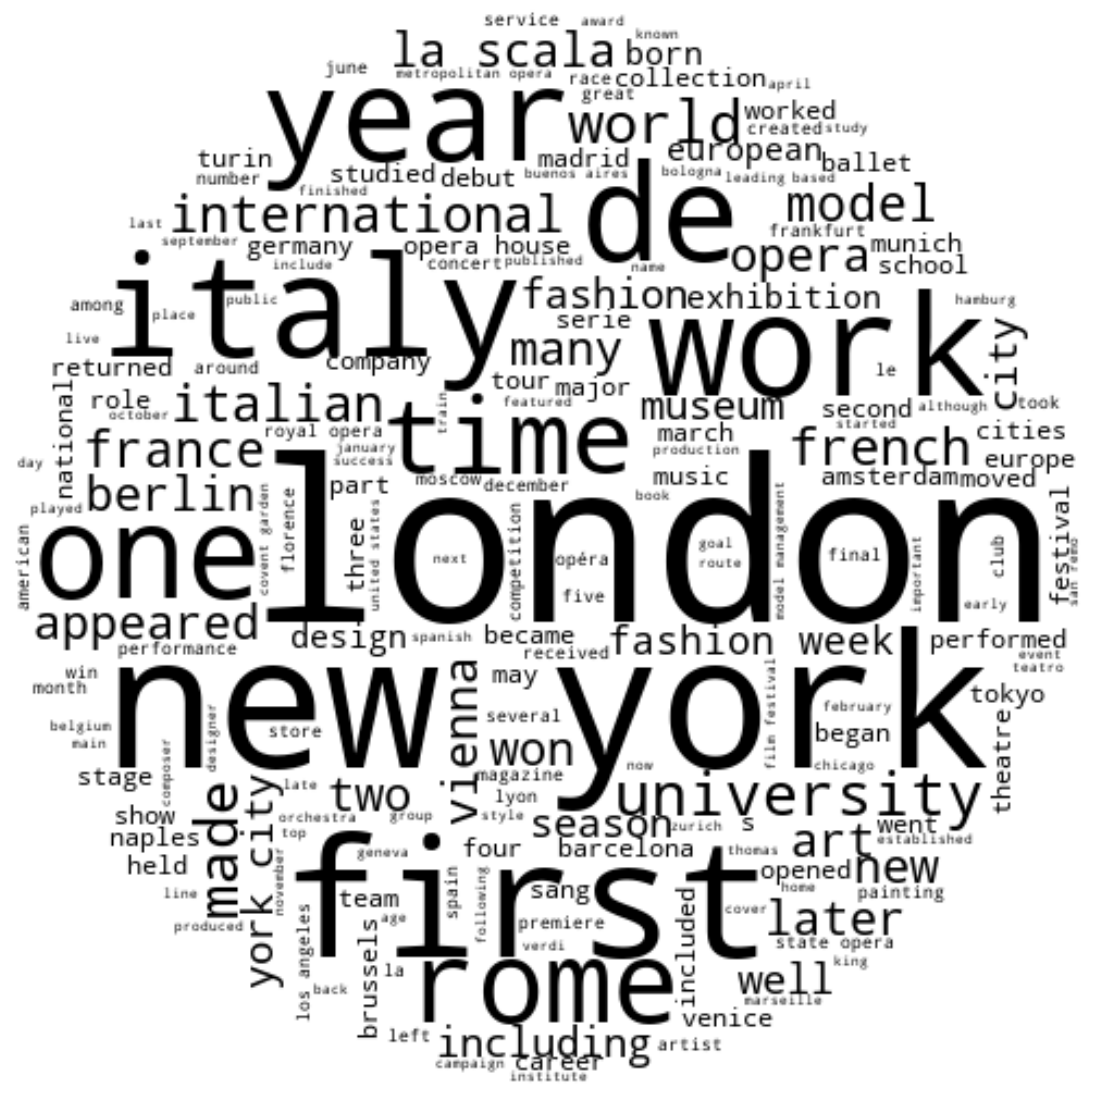

In [274]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")